In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

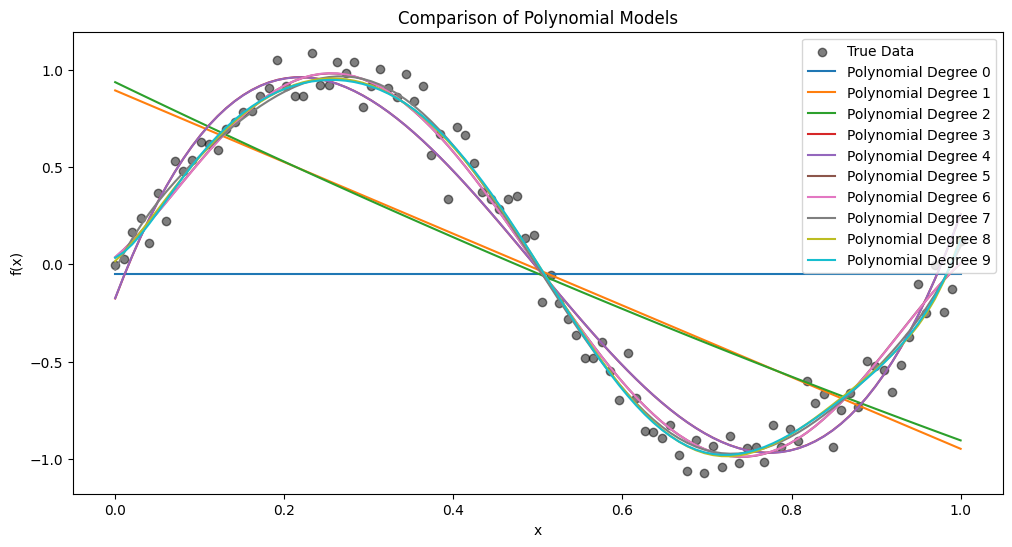

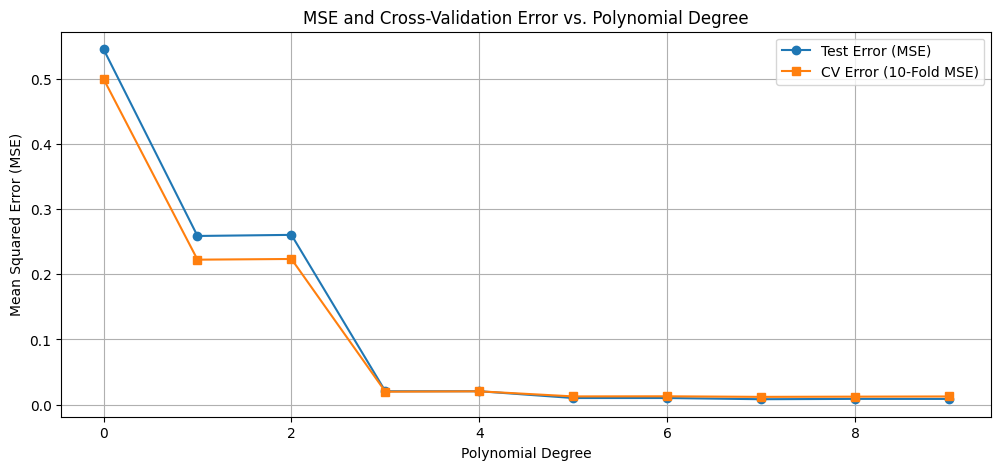

In [20]:
# Generate synthetic dataset
X = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
)

# Define polynomial degrees from 0 to 9
degrees = list(range(10))
models = {}
test_errors = {}
cv_errors = {}

# Train models and compute errors
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    models[degree] = model
    test_errors[degree] = np.mean((model.predict(X_test) - y_test) ** 2)
    cv_errors[degree] = -np.mean(
        cross_val_score(
            model, X_train, y_train, scoring="neg_mean_squared_error", cv=10
        )
    )

# Convert errors to DataFrame
errors_df = pd.DataFrame(
    {
        "Degree": degrees,
        "Test Error (MSE)": [test_errors[d] for d in degrees],
        "CV Error (10-Fold MSE)": [cv_errors[d] for d in degrees],
    }
)

# Plot polynomial models with predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="True Data", color="black", alpha=0.5)
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
for degree in degrees:
    y_pred = models[degree].predict(X_plot)
    plt.plot(X_plot, y_pred, label=f"Polynomial Degree {degree}")
plt.title("Comparison of Polynomial Models")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# Plot MSE per degree
plt.figure(figsize=(12, 5))
plt.plot(degrees, errors_df["Test Error (MSE)"], marker="o", label="Test Error (MSE)")
plt.plot(
    degrees,
    errors_df["CV Error (10-Fold MSE)"],
    marker="s",
    label="CV Error (10-Fold MSE)",
)
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE and Cross-Validation Error vs. Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


# Display errors
errors_df = pd.DataFrame({
    "Degree": degrees,
    "Test Error (MSE)": [test_errors[d] for d in degrees],
    "CV Error (10-Fold MSE)": [cv_errors[d] for d in degrees]
})

In [21]:
errors_df

,Degree,Test Error (MSE),CV Error (10-Fold MSE)
0,0,0.544945,0.499397
1,1,0.258595,0.222255
2,2,0.260282,0.223326
3,3,0.020495,0.019815
4,4,0.020531,0.020367
5,5,0.010116,0.012578
6,6,0.010106,0.012752
7,7,0.008272,0.011877
8,8,0.008797,0.012227
9,9,0.008733,0.012510


In [22]:
# Find the best degrees with the least errors
best_test_degree = errors_df.loc[errors_df["Test Error (MSE)"].idxmin(), "Degree"]
best_cv_degree = errors_df.loc[errors_df["CV Error (10-Fold MSE)"].idxmin(), "Degree"]
print(f"Best degree based on Test Error: {best_test_degree}")
print(f"Best degree based on CV Error: {best_cv_degree}")

Best degree based on Test Error: 7
Best degree based on CV Error: 7


For Reproducibility, let's run the testing and cross validation several times

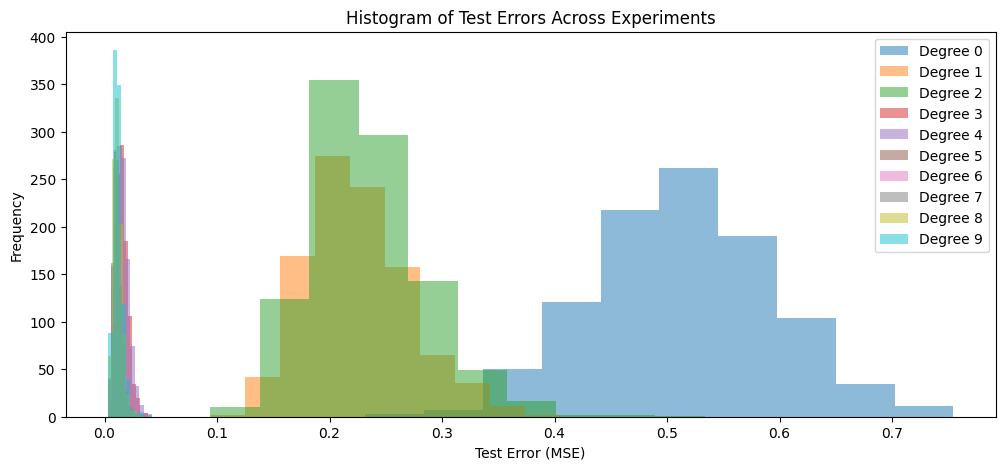

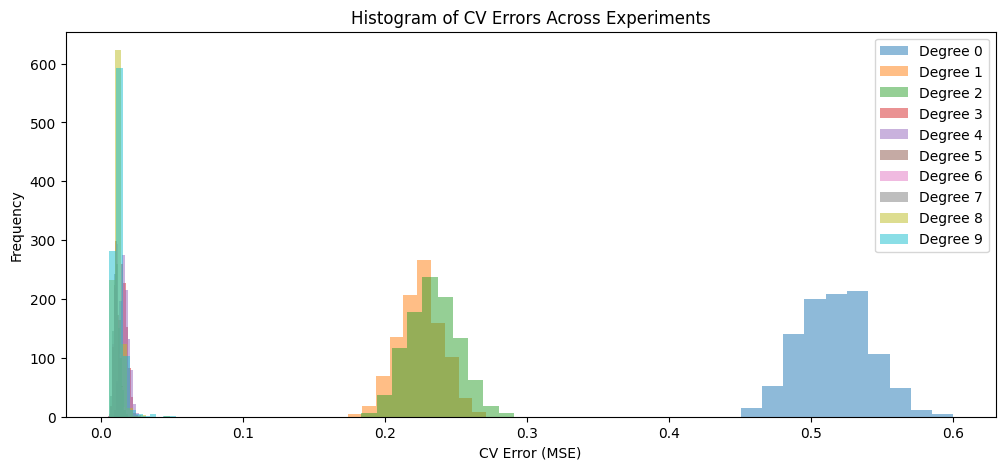

In [23]:
# Define polynomial degrees from 0 to 9
num_experiments = 1000
test_errors_all = {degree: [] for degree in degrees}
cv_errors_all = {degree: [] for degree in degrees}

# Perform multiple evaluations
for _ in range(num_experiments):
    y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)
        test_errors_all[degree].append(np.mean((model.predict(X_test) - y_test) ** 2))
        cv_errors_all[degree].append(
            -np.mean(
                cross_val_score(
                    model, X_train, y_train, scoring="neg_mean_squared_error", cv=10
                )
            )
        )

# Convert errors to DataFrame
errors_df = pd.DataFrame(
    {
        "Degree": degrees,
        "Mean Test Error (MSE)": [np.mean(test_errors_all[d]) for d in degrees],
        "Mean CV Error (10-Fold MSE)": [np.mean(cv_errors_all[d]) for d in degrees],
    }
)

# Plot histograms for errors per degree
plt.figure(figsize=(12, 5))
for degree in degrees:
    plt.hist(test_errors_all[degree], alpha=0.5, label=f"Degree {degree}")
plt.xlabel("Test Error (MSE)")
plt.ylabel("Frequency")
plt.title("Histogram of Test Errors Across Experiments")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for degree in degrees:
    plt.hist(cv_errors_all[degree], alpha=0.5, label=f"Degree {degree}")
plt.xlabel("CV Error (MSE)")
plt.ylabel("Frequency")
plt.title("Histogram of CV Errors Across Experiments")
plt.legend()
plt.show()

Let's focus on smaller errors:

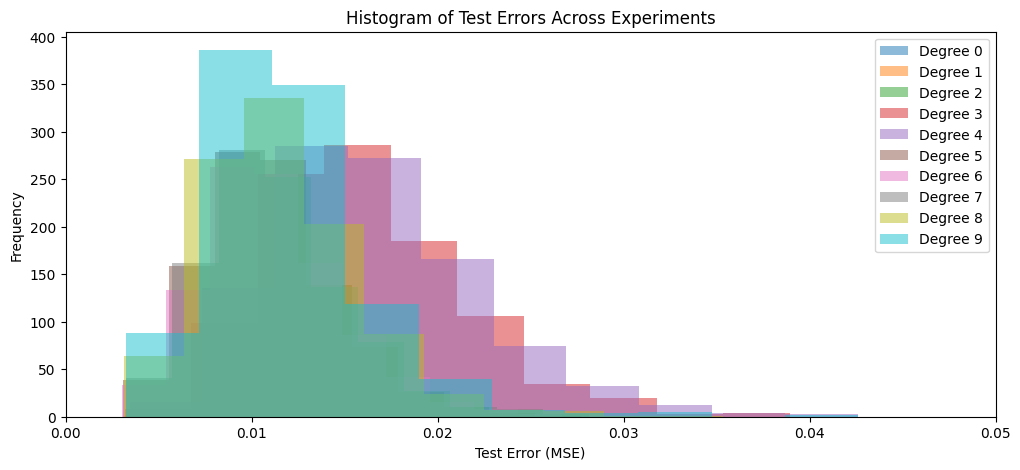

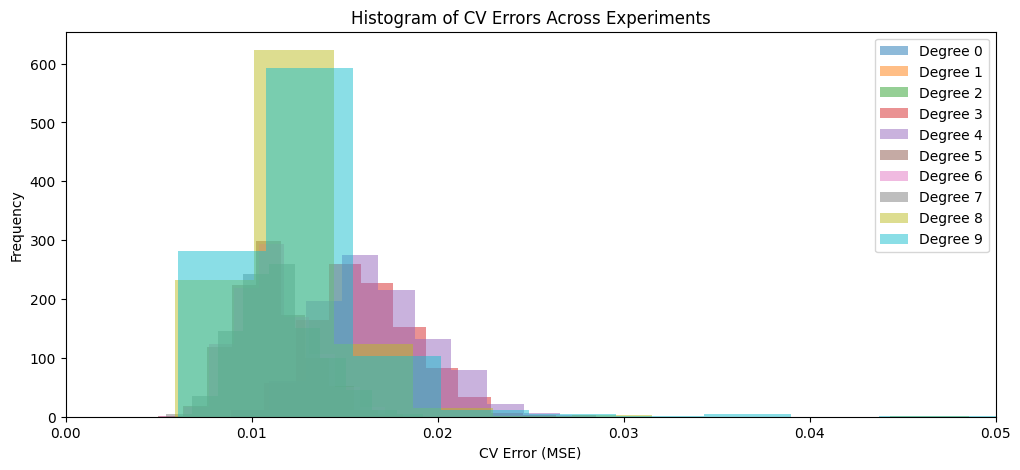

In [24]:
# Plot histograms for errors per degree
plt.figure(figsize=(12, 5))
for degree in degrees:
    plt.hist(test_errors_all[degree], alpha=0.5, label=f"Degree {degree}")
plt.xlabel("Test Error (MSE)")
plt.xlim(0, 0.05)
plt.ylabel("Frequency")
plt.title("Histogram of Test Errors Across Experiments")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for degree in degrees:
    plt.hist(cv_errors_all[degree], alpha=0.5, label=f"Degree {degree}")
plt.xlabel("CV Error (MSE)")
plt.xlim(0, 0.05)
plt.ylabel("Frequency")
plt.title("Histogram of CV Errors Across Experiments")
plt.legend()
plt.show()